In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats, scipy.special

# Дано:

In [2]:
years = 9
k1 = 1.8
k2 = 1.24
k3 = 1.15
k4 = k1

one_year = 3.154*10**7
tau_r = years * one_year

# Списки вероятностей безотказной работы объединенные по закону распределения
p_exp = np.array([0.981, 0.991, 0.994, 0.976, 0.996])
p_norm = np.array([0.978])
p_l_norm = np.array([0.964])

# Решение:

Введём некоторые функции для поиска параметров случайных распределений. Они дублируют решение выполненное в MathCad и нужны для избежания потери точности рассчетов и для векторизации вычислений.

In [3]:
# Функция поиска параметра lambda, эксп. закона распределения:
def find_lamb_exp(p_i):
    return (-1/tau_r)*(np.log(p_i))

# Функция поиска времени безотказной работы эксп. закона распределения:
def norm_exp(x_i, lamb_i):
    return (-1/lamb_i)*np.log(x_i)

# Функция поиска параметра sigma, норм. закона распределения:
def find_sig_norm(p_i, k):
    return (tau_r - k*tau_r)/(scipy.special.ndtri(1-p_i))

# Функция поиска времени безотказной работы норм. закона распределения:
def norm(x_i, sig_i, k):
    return (scipy.special.ndtri(1-x_i))*sig_i + k*tau_r

# Найдем параметр sigma(zi) в MathCad и вычислим остальные параметры для логнормального распределения P4i:
sig_zi = 0.30145307552088571247
m_zi = np.log(k4*tau_r)-(sig_zi ** 2 / 2)
sig_ti = ((np.exp(sig_zi ** 2) - 1) * np.exp(2 * m_zi + sig_zi ** 2)) ** (1 / 2)

# Функция поиска времени безотказной работы логнормального закона распределения:
def log_norm(x_i):
    return np.exp(scipy.special.ndtri(1-x_i)*sig_zi + m_zi)

Проверим функции.

In [4]:
lamb_exp = find_lamb_exp(p_exp)
# print(lamb_exp)
print('Выполним проверку функций', end='\n\n')
print('Эксп. закон: Ti при Xi=Pi (Должно быть равно tau_r)', norm_exp(p_exp, lamb_exp), end='\n\n')

print('Норм. закон: Ti при Xi=Pi=0.978 (Должно быть равно tau_r)', norm(p_norm, find_sig_norm(p_norm, k1), k1), end='\n\n')

print('Лог.норм. закон: Ti при Xi=Pi=0.964 (Должно быть равно tau_r)', log_norm(p_l_norm), end='\n\n')

print('tau_r =', tau_r)

Выполним проверку функций

Эксп. закон: Ti при Xi=Pi (Должно быть равно tau_r) [2.8386e+08 2.8386e+08 2.8386e+08 2.8386e+08 2.8386e+08]

Норм. закон: Ti при Xi=Pi=0.978 (Должно быть равно tau_r) [2.8386e+08]

Лог.норм. закон: Ti при Xi=Pi=0.964 (Должно быть равно tau_r) [2.8386e+08]

tau_r = 283860000.0


# Генерация

Используя стандартный равномерный генератор псевдослучайных чисел, сгенерируем матрицу (22$*$n) для использования в дальнейших рассчетах. Генератор имеет период $2^{128}$.

Можно заметить, что распределение случайных величин равномерно в промежутке [0:1] для каждого элемента.
А значит генератор удовлетворяет требованиям.


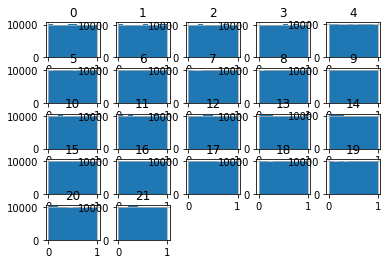

In [5]:
# Зададим количество итераций:
n = 100000
# Альтернативный генератор
def random_gen(n, m):
    random_number = np.random.uniform(0, 2, (n, m*3))
    return random_number[random_number<=1][:m*n].reshape(n, m)

# Инициализация генератора
rg = np.random.default_rng()
# Генерация 22 рядов по n итераций случайных величин равномерно распределенных в промежутке [0,1]
j = rg.random((22, n))
# j = random_gen(22, n) # альтернативный генератор

# Создадим списки вероятностей безотк.раб. для элементов подгрупп:
p_1 = np.array([0.978])
p_2 = np.array([0.981, 0.981, 0.981, 0.991, 0.994])
p_3 = np.array([0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.996, 0.996, 0.996])
p_4 = np.array([0.964, 0.964, 0.964])
J_test = pd.DataFrame(j.T)
J_test.hist()
print('Можно заметить, что распределение случайных величин равномерно в промежутке [0:1] \
для каждого элемента.\nА значит генератор удовлетворяет требованиям.')


Определим время безотказной работы элементов 1-й подсистемы для всех итераций:

Элемент #1.1: 0.97769

Рассмотрим график распределения для проверки его на "нормальность": 


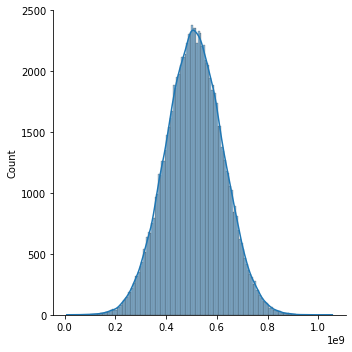

In [6]:
lamb_1 = find_sig_norm(p_1, k1)
pods_1 = norm(j[0,:], lamb_1, k1)

# Проверка на соответствие заданной вероятности безотказной работы:
print('Элемент #1.1:', (pods_1>tau_r).mean())
print('\nРассмотрим график распределения для проверки его \
на "нормальность":','\n', sns.displot(pods_1, kde=True))


Определим время безотказной работы элементов 2-й подсистемы для всех итераций:

Элемент #2.1: 0.98079
Элемент #2.2: 0.98102
Элемент #2.3: 0.98123
Элемент #2.4: 0.99114
Элемент #2.5: 0.99379

Рассмотрим график одного из распределений для проверки на "эксп. нормальность": 


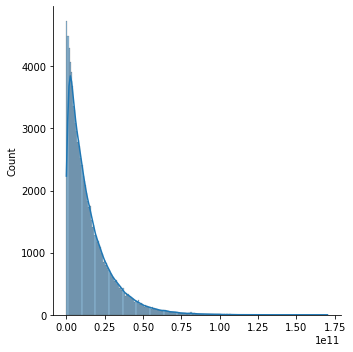

In [7]:
lamb_2 = find_lamb_exp(p_2)
pods_2 = np.empty((lamb_2.shape[0], (j.shape[1])))

for k in range(p_2.shape[0]):
      pods_2[k] = norm_exp(j[1+k,:], lamb_2[k])[np.newaxis, :]

# Проверка на соответствие заданной вероятности безотказной работы:
for k in range(pods_2.shape[0]):
    print(f'Элемент #2.{k+1}:', (pods_2[k]>tau_r).mean())

print('\nРассмотрим график одного из распределений для проверки \
на "эксп. нормальность":','\n', sns.displot(pods_2[0], kde=True))

# Введём ограничение на максимальное время работы элементов (выполняется после отрисовки графика):
np.place(pods_2[:3], (pods_2[:3]>tau_r*k2), tau_r*k2)


Определим время безотказной работы элементов 3-й подсистемы для всех итераций:

Элемент #3.1: 0.97625
Элемент #3.2: 0.9765
Элемент #3.3: 0.97582
Элемент #3.4: 0.97577
Элемент #3.5: 0.97621
Элемент #3.6: 0.97627
Элемент #3.7: 0.97532
Элемент #3.8: 0.97571
Элемент #3.9: 0.97604
Элемент #3.10: 0.97697
Элемент #3.11: 0.99634
Элемент #3.12: 0.99586
Элемент #3.13: 0.0

Рассмотрим график одной из величин для проверки распределения на "эксп. нормальность": 


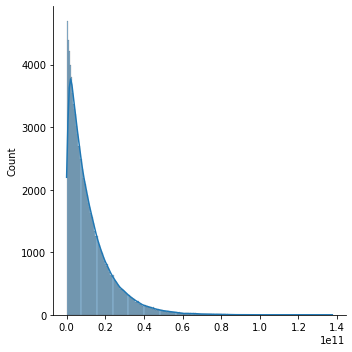

In [8]:
lamb_3 = find_lamb_exp(p_3[:-1])
pods_3 = np.empty((p_3.shape[0], (j.shape[1])))

for k in range(p_3.shape[0]-1):
      pods_3[k] = norm_exp(j[6+k,:], lamb_3[k])[np.newaxis, :]
pods_3[-1] = j[18]

# Проверка на соответствие заданной вероятности безотказной работы:
for k in range(pods_3.shape[0]):
    print(f'Элемент #3.{k+1}:', (pods_3[k]>tau_r).mean())
    
print('\nРассмотрим график одной из величин для проверки распределения \
на "эксп. нормальность":','\n', sns.displot(pods_3[0], kde=True))

# Введём ограничение на максимальное время работы элементов (выполняется после отрисовки графика):
np.place(pods_3[:10], (pods_3[:10]>tau_r*k3), tau_r*k3)


Определим время безотказной работы элементов 4-й подсистемы для всех итераций:

Элемент #4.1: 0.96365
Элемент #4.2: 0.96391
Элемент #4.3: 0.96479

Рассмотрим график одной из величин для проверки распределения на "логнормальность": 


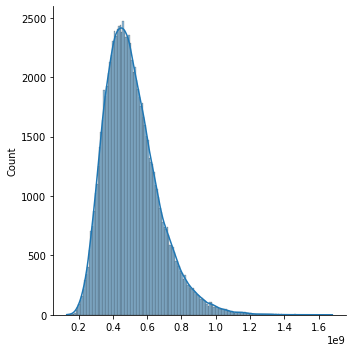

In [9]:
pods_4 = log_norm(j[-3:])
# Проверка на соответствие заданной вероятности безотказной работы:
for i in range(pods_4.shape[0]): print(f'Элемент #4.{i+1}:',(pods_4[i]>tau_r).mean())
    
print('\nРассмотрим график одной из величин для проверки распределения \
на "логнормальность":','\n', sns.displot(pods_4[0], kde=True))

Для наглядности сформируем таблицу сгенерированных значений для всех элементов системы (с введенным ограничением на максимальное время безотказной работы):

In [10]:
System = pd.DataFrame(np.concatenate((pods_1[np.newaxis], pods_2, pods_3, pods_4), axis=0))
System.rename(index={0: '1.1', 1: '2.1', 2: '2.2', 3: '2.3', 4: '2.3хр', 5: 'П1',
                     6: '3.1', 7: '3.2', 8: '3.3', 9: '3.4', 10: '3.5', 11: '3.6',
                     12: '3.7', 13: '3.8', 14: '3.9', 15: '3.10', 16: '3.9хр', 17: '3.10хр',
                     18: 'П2', 19: '4.1', 20: '4.2', 21: '4.3'}, inplace=True)

In [11]:
System

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
1.1,2.922048e+08,4.013052e+08,4.817780e+08,5.365853e+08,4.915972e+08,5.657949e+08,4.717824e+08,4.344676e+08,4.932495e+08,4.409643e+08,...,5.848607e+08,4.218748e+08,4.482432e+08,2.709357e+08,4.815678e+08,4.845317e+08,5.514967e+08,5.650714e+08,3.581776e+08,4.799027e+08
2.1,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08
2.2,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,1.199524e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08
2.3,3.519864e+08,2.546122e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,1.747390e+07,3.519864e+08,3.519864e+08,3.519864e+08
2.3хр,2.539712e+10,2.046717e+10,1.208761e+10,4.129357e+10,1.731561e+10,2.039680e+09,2.188543e+10,1.673093e+10,1.843401e+10,1.100505e+10,...,1.509186e+10,3.822716e+10,1.793209e+10,4.767655e+10,1.961524e+09,9.647970e+10,1.596996e+10,7.871416e+10,2.303958e+10,8.218300e+10
П1,2.247133e+10,4.680385e+10,9.336839e+10,9.942530e+10,1.386983e+11,2.333787e+10,1.440718e+10,4.279295e+10,8.203358e+10,1.940181e+09,...,2.611303e+10,2.488690e+10,8.860261e+10,4.279338e+10,1.457455e+11,1.240777e+11,1.756489e+10,1.282767e+10,5.289447e+10,1.053130e+10
3.1,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,2.000044e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08
3.2,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08
3.3,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08
3.4,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,2.263606e+08,3.264390e+08,3.264390e+08,3.264390e+08


Вероятности безотказной работы элементов:

In [12]:
(System.T>=tau_r).mean()

1.1       0.97769
2.1       0.98079
2.2       0.98102
2.3       0.98123
2.3хр     0.99114
П1        0.99379
3.1       0.97625
3.2       0.97650
3.3       0.97582
3.4       0.97577
3.5       0.97621
3.6       0.97627
3.7       0.97532
3.8       0.97571
3.9       0.97604
3.10      0.97697
3.9хр     0.99634
3.10хр    0.99586
П2        0.00000
4.1       0.96365
4.2       0.96391
4.3       0.96479
dtype: float64

Отдельная проверка элемента П2:

In [13]:
(System.T['П2']<0.996).mean()

0.99619

# Переход к работе с алгоритмами.

По-возможности будут использоваться функции и методы библиотеки NumPy, дабы ускорить работу алгоритма (матричные операции много быстрее, в сравнении с простыми циклами).

Создание таблицы для занесения в неё времени работы элементов определяющих минимальное время безотказной работы подсистем 1-4 при j-й итерации:

In [14]:
T = pd.DataFrame(columns=['T1_j', 'T2_j', 'T3_j', 'T4_j'])
T.index.name = 'j'

Занесение в таблицу времени безотказной работы 1-й подсистемы:

In [15]:
T.T1_j = pods_1
# Предпросмотр таблицы минимального времени безотказной работы подсистем (первые 5 строк).
T.head()

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,2.922048e+08,NaN,NaN,NaN
1,4.013052e+08,NaN,NaN,NaN
2,4.817780e+08,NaN,NaN,NaN
3,5.365853e+08,NaN,NaN,NaN
4,4.915972e+08,NaN,NaN,NaN


Исполнение алгоритма по поиску времени безотказной работы 4-й подсистемы:

In [16]:
T.T4_j = np.fmax(np.amin(pods_4[:2], axis=0), pods_4[2])
# Предпросмотр таблицы минимального времени безотказной работы подсистем (первые 5 строк).
T.head()

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,2.922048e+08,NaN,NaN,1.108519e+09
1,4.013052e+08,NaN,NaN,7.965272e+08
2,4.817780e+08,NaN,NaN,6.494635e+08
3,5.365853e+08,NaN,NaN,4.157309e+08
4,4.915972e+08,NaN,NaN,5.885579e+08


Исполнение алгоритма по поиску времени безотказной работы 2-й подсистемы:

In [17]:
# Объявляем вектор А, который удовлетворяет условию: A = MIN{t2.1_j, t2.2_j}:
A = np.amin(pods_2[:2], axis=0)

In [18]:
# Опишем правило выделения элементов из вектора А, которые: 
# 1) меньше tau_r; 
# 2) для своей итерации имеют t2.3хр_j, БОЛЬШИЙ чем соответствующий элемент из списка А. 

cond_1 = (A < tau_r) & (pods_2[3] >= A)

In [19]:
# Введём условия для определения (t2.3_j >= tП1_j), и объединим с предыдущим условием.
A_plus_tP = pods_2[2] >= pods_2[4]
A_plus_t23 = np.logical_not(A_plus_tP)

A_plus_t23 = cond_1 & A_plus_t23
A_plus_tP = cond_1 & A_plus_tP

In [20]:
# Используем принятые правила как маску для манипуляций с элементами вектора А:
np.place(A, A_plus_t23, (A[A_plus_t23]+pods_2[2][A_plus_t23]))
np.place(A, A_plus_tP, (A[A_plus_tP]+pods_2[4][A_plus_tP]))

In [21]:
# Внесём вектор времени безотказной работы второй подсистемы в таблицу. И выведем первые 5 строк из таблицы.
T.T2_j = A

In [22]:
# Предпросмотр таблицы минимального времени безотказной работы подсистем (первые 5 строк).
T.head()

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,2.922048e+08,351986400.0,NaN,1.108519e+09
1,4.013052e+08,351986400.0,NaN,7.965272e+08
2,4.817780e+08,351986400.0,NaN,6.494635e+08
3,5.365853e+08,351986400.0,NaN,4.157309e+08
4,4.915972e+08,351986400.0,NaN,5.885579e+08


Исполнение алгоритма по поиску времени безотказной работы 3-й подсистемы:

In [23]:
# Данная ячейка несёт в себе отладочные данные использованные во время написания алгоритма.

# pods_3t = np.array(pods_3.T[:2])
# pods_3t[1][2] = 3.26439000e+07
# pods_3t[1][1] = 1
# pods_3t[1][3] = 1
# pods_3t[1]

In [24]:
# Соберём дополнительную таблицу(матрицу) запасных элементов и их времен хранения, транспонируем матрицу для удобства:
zapas = np.array(pods_3[8:12])
zapas = zapas.T

x = np.array(pods_3.T)

# Реализация алгоритма для поиска минимального времени работы подсистемы 3 по соответствующей блок-схеме:

for i in range(x.shape[0]):
    if x[i][:8].min() < tau_r:
        if x[i][12] < p_3[12]:
            if x[i][:8].min() < zapas[i][2]:
                x[i][x[i][:8].argmin()] = x[i][:8].min() + zapas[i][0]
            if x[i][:8].min() < tau_r:
                if x[i][:8].min() < zapas[i][3]:
                    x[i][x[i][:8].argmin()] = x[i][:8].min() + zapas[i][1]


T.T3_j = np.amin(x.T[:8], axis=0)

Получаем таблицу минимального времени работы всех подсистем:

In [25]:
T

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,2.922048e+08,351986400.0,326439000.0,1.108519e+09
1,4.013052e+08,351986400.0,326439000.0,7.965272e+08
2,4.817780e+08,351986400.0,326439000.0,6.494635e+08
3,5.365853e+08,351986400.0,326439000.0,4.157309e+08
4,4.915972e+08,351986400.0,326439000.0,5.885579e+08
...,...,...,...,...
99995,4.845317e+08,351986400.0,326439000.0,7.239782e+08
99996,5.514967e+08,351986400.0,326439000.0,5.524889e+08
99997,5.650714e+08,351986400.0,326439000.0,4.684673e+08


Вероятности безотказной работы каждой подгруппы

In [26]:
(T>tau_r).mean()

T1_j    0.97769
T2_j    0.99940
T3_j    0.99811
T4_j    0.99750
dtype: float64

# Найдём искомые параметры

In [27]:
T_sas = (T.min(axis=1)).mean()

In [28]:
P = (T.min(axis=1)>=tau_r).mean()

Итого имеем $\hat{T}_{cac}$, и $\hat{P}$:

In [29]:
T_sas

322641279.1799682

In [30]:
T_sas/one_year

10.229590335446042

In [31]:
P

0.97279

Произведём проверку точности

In [32]:
gamma = 0.997
d_1 = d_2 = 0.003

In [33]:
t_gamma = scipy.special.ndtri((1+gamma)/2)

In [34]:
delta_1 = (t_gamma/P)*(np.sqrt((P*(1-P))/n))

In [35]:
summ = ((T.min(axis=1)-T_sas)**2).sum()
delta_2 = (t_gamma/T_sas)*np.sqrt((1/(n*(n-1)))*(summ))

In [36]:
if delta_1 < d_1:
    print(f'Нужная точность достигнута delta_1 = {delta_1}')
else:
    print(f'Точность не достигнута delta_1 = {delta_1}')
if delta_2 < d_2:
    print(f'Нужная точность достигнута delta_2 = {delta_2}')
else:
    print(f'Точность не достигнута delta_2 = {delta_2}')

Нужная точность достигнута delta_1 = 0.001569568480563883
Нужная точность достигнута delta_2 = 0.0004862948265867415


# К вопросу о принципах моделирования времени безотказной работы, распределенной по нормальному и логнормальному законам

Чтобы сгенерировать набор значений распределенных по нормальному либо логнормальному законам, необходимо смоделировать для ${Y_i}\in[0, 1]$, ${X_N}$ - случайную величину распределенную по нормированному нормальному закону. И далее использовать ${X_N}$ для моделирования указанных выше законов, по следующим правилам: $X = {X_N}*{\sigma_X}+{m_X}$ - для нормального закона распределения; $X = exp\{{m_z}+{\sigma_z}*{X_N}\}$ - для логнормального закона.

В библиотеке ScyPy существует функция "scipy.special.ndtri()", которая является "черным ящиком" упрощающим процесс получения реализаций случайной величины нормированной по нормальному закону. Данная функция возвращает аргумент x, для которого площадь под гауссовой функцией плотности вероятности (проинтегрированной от минус бесконечности до x) равна y. Для доказательства равноценности методов, предлагаю следующий код:

In [49]:
y_i = rg.random((4000, 40000))

In [50]:
x_n = (y_i.sum(axis=0)-2000)/np.sqrt(4000/12)

<AxesSubplot:ylabel='Count'>

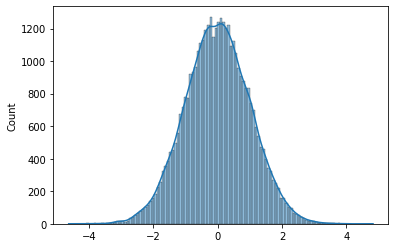

In [51]:
sns.histplot(x_n, kde=True)

In [52]:
y2_n = rg.random((40000))
x2_n = scipy.special.ndtri(y2_n)

Распределения X_N, X2_N, на одном графике:
 AxesSubplot(0.125,0.125;0.775x0.755)


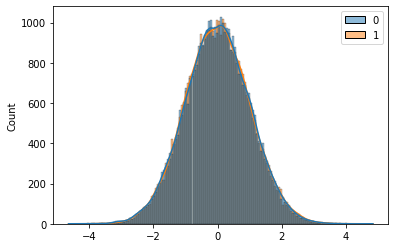

In [53]:
print('Распределения X_N, X2_N, на одном графике:\n', sns.histplot((x_n, x2_n), kde=True))

In [54]:
print('M{X_N}:', x_n.mean())
print('Sigma{X_N}:', x_n.std(), '\n')

print('M{X2_N}:', x2_n.mean())
print('Sigma{X2_N}:', x2_n.std())

M{X_N}: -0.00859768267161105
Sigma{X_N}: 1.0042194085891332 

M{X2_N}: -0.006128956478862948
Sigma{X2_N}: 1.0032387447520126
